# Multi-label classification with tensorflow : Identifying irrigation targets based on sensor data

### Exploratory Data Analysis


We're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, We could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

It's time to build an intelligent irrigation machine! But first, let;s explore the dataset

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("irrigation_machine.csv")
data = data.iloc[:,1:]
print(data.shape)
data.head()

(2000, 23)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


This dataset has 20 features and 3 targets. It is hard to visualize using 2D graphs. For now, let us just use sensor 18 and sensor 19 features and parcel 1 target feature to see what the dataset looks like. With 20 sensors the whole thing appears really complex and deep learning is an excellent choice in this case.

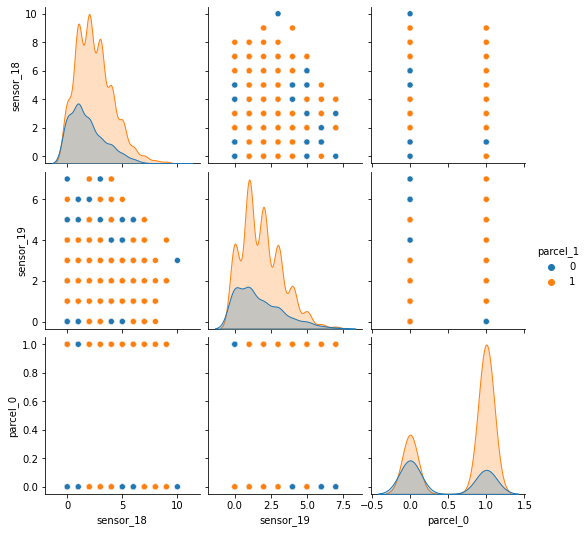

In [9]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Use pairplot and set the hue to be our class column
sns.pairplot(data.iloc[:,18:22], hue='parcel_1') 

# Show the plot
plt.show()



### Building a simple model


We will first build a very simple model consisting of 2 layers. We will use sigmoid activation function instead of softmax. Softmax will distribute the probabilities among all possible classes so that the sum of the probabilities of each row is 1. However, since we are using multi-level classification, using sigmoid to predict probabilities of each individual class is the most reasonable choice.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, activation='relu', input_shape=(20,)))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in the farm is the right thing to do, according to the network, given the input sensor measurements.

Now, we will take the dataset and split it into training and testing set. We will train the model with training set. Later, we will test the dataset with the testing set.



In [13]:
from sklearn.model_selection import train_test_split

sensors = data.iloc[:,:20]
parcels = data.iloc[:,20:]

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, random_state=104,test_size=0.25, shuffle=True)

print(sensors_train.shape)
print(parcels_train.shape)
print(sensors_test.shape)
print(parcels_test.shape)


(1500, 20)
(1500, 3)
(500, 20)
(500, 3)


In [14]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)



Epoch 1/100
38/38 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5708 - val_loss: 0.5292 - val_accuracy: 0.3900
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.4958 - val_loss: 0.4291 - val_accuracy: 0.6033
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.5642 - val_loss: 0.3718 - val_accuracy: 0.6167
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.5917 - val_loss: 0.3329 - val_accuracy: 0.6200
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.6000 - val_loss: 0.3051 - val_accuracy: 0.6200
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.6208 - val_loss: 0.2915 - val_accuracy: 0.6000
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.6025 - val_loss: 0.2803 - val_accuracy: 0.6700
Epoch 8/100
3

In [15]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

16/16 [==============================] - 0s 623us/step - loss: 0.2497 - accuracy: 0.6260
Accuracy: 0.6259999871253967
